# Ottawa, Canada Downburst 27 September 2017

This notebook plots RAP model and radar reflectivity data for the 27 September 2017 Ottawa, Canada downburst.

In [1]:
%matplotlib inline


Z shape (801, 775) [[-214718.359375 -214718.359375 -214718.359375 ..., -214718.359375
  -214718.359375 -214718.359375]
 [-214718.359375 -214718.359375 -214718.359375 ..., -214718.359375
  -214718.359375 -214718.359375]
 [-214718.359375 -214718.359375 -214718.359375 ..., -214718.359375
  -214718.359375 -214718.359375]
 ..., 
 [-214718.359375 -214718.359375 -214718.359375 ..., -214718.359375
  -214718.359375 -214718.359375]
 [-214718.359375 -214718.359375 -214718.359375 ..., -214718.359375
  -214718.359375 -214718.359375]
 [-284241.34375  -214718.359375 -214718.359375 ..., -214718.359375
  -214718.359375 -214718.359375]]
X shape, Y shape (775,) (801,)
lats shape, lons shape (801, 775) (801, 775)
Z_pos shape (801, 775) [[ 21.47183594  21.47183594  21.47183594 ...,  21.47183594  21.47183594
   21.47183594]
 [ 21.47183594  21.47183594  21.47183594 ...,  21.47183594  21.47183594
   21.47183594]
 [ 21.47183594  21.47183594  21.47183594 ...,  21.47183594  21.47183594
   21.47183594]
 ..., 
 [ 

C:\Anaconda32\lib\site-packages\mpl_toolkits\basemap\__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Anaconda32\lib\site-packages\mpl_toolkits\basemap\__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


315383.338302 341344.474255


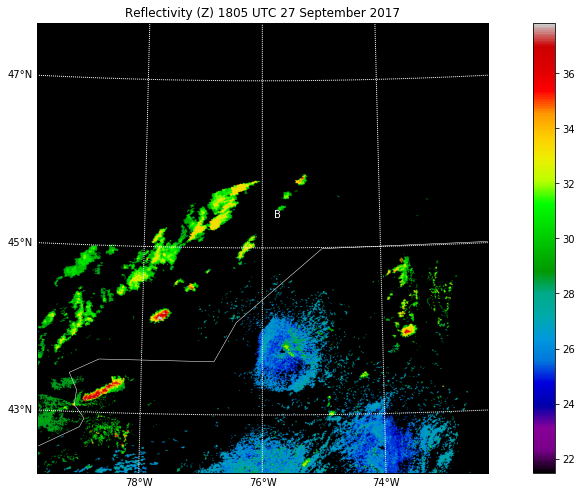

Z shape (801, 775) [[-214718.359375 -214718.359375 -214718.359375 ..., -214718.359375
  -214718.359375 -214718.359375]
 [-214718.359375 -214718.359375 -214718.359375 ..., -214718.359375
  -214718.359375 -214718.359375]
 [-214718.359375 -214718.359375 -214718.359375 ..., -214718.359375
  -214718.359375 -214718.359375]
 ..., 
 [-267883.       -267883.       -267883.       ..., -214718.359375
  -214718.359375 -214718.359375]
 [-267883.       -267883.       -267883.       ..., -214718.359375
  -214718.359375 -214718.359375]
 [-267883.       -267883.       -267883.       ..., -214718.359375
  -214718.359375 -214718.359375]]
X shape, Y shape (775,) (801,)
lats shape, lons shape (801, 775) (801, 775)
Z_pos shape (801, 775) [[ 21.47183594  21.47183594  21.47183594 ...,  21.47183594  21.47183594
   21.47183594]
 [ 21.47183594  21.47183594  21.47183594 ...,  21.47183594  21.47183594
   21.47183594]
 [ 21.47183594  21.47183594  21.47183594 ...,  21.47183594  21.47183594
   21.47183594]
 ..., 
 [ 

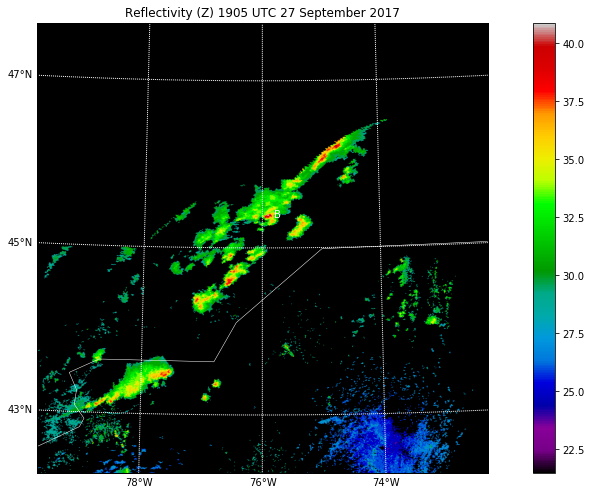

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm

plt.rcParams["figure.figsize"] = [8,8]

def read_Z_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
    X = nc_fid.variables["x"][:]
    Y = nc_fid.variables["y"][:]
    lats = nc_fid.variables['lat'][:]  # extract/copy the data
    lons = nc_fid.variables['lon'][:]
    nc_fid.close()
    return Z, X, Y, lats, lons

Z_file = 'Level3_Composite_n0r_1km_20170927_1805.gini.nc4'
Z, X, Y, lats, lons = read_Z_plot(Z_file)
Z= Z[0,:,:]
print('Z shape', Z.shape, Z)
print('X shape, Y shape', X.shape, Y.shape)
print('lats shape, lons shape', lats.shape, lons.shape)
makepos = np.full((801,775),-1)
Z_pos = np.multiply(Z,makepos)
Z_pos = Z_pos/10000
print('Z_pos shape', Z_pos.shape, Z_pos)
np.delete(Z,[0,1,2])
np.delete(X,[0,1,2])
np.delete(Y,[0,1,2])

# CREATE A MAP

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(width=600000,height=600000,
            resolution='l',projection='stere',\
            lat_ts=45,lat_0=45,lon_0=-76.)
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,Z_pos,shading='gouraud',cmap=plt.cm.nipy_spectral,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(43.,48.,2.),labels=[True,False,False,False],color="white")
m.drawmeridians(np.arange(-78.,-73.,2.),labels=[False,False,False,True],color="white")
m.drawcountries(color="white")
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
np.delete(Z_pos,[0,1,2])
np.delete(lats,[0,1])
np.delete(lons,[0,1])
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data', color="white")
cb = m.colorbar(im1,"right", size="5%", pad="10%")
ax.set_title('Reflectivity (Z) 1805 UTC 27 September 2017')
plt.savefig("Z_0927_1805.png",bbox_inches='tight')
plt.show()

Z_file = 'Level3_Composite_n0r_1km_20170927_1905.gini.nc4'
Z, X, Y, lats, lons = read_Z_plot(Z_file)
Z= Z[0,:,:]
print('Z shape', Z.shape, Z)
print('X shape, Y shape', X.shape, Y.shape)
print('lats shape, lons shape', lats.shape, lons.shape)
makepos = np.full((801,775),-1)
Z_pos = np.multiply(Z,makepos)
Z_pos = Z_pos/10000
print('Z_pos shape', Z_pos.shape, Z_pos)
np.delete(Z,[0,1,2])
np.delete(X,[0,1,2])
np.delete(Y,[0,1,2])

# CREATE A MAP

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(width=600000,height=600000,
            resolution='l',projection='stere',\
            lat_ts=45,lat_0=45,lon_0=-76.)
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,Z_pos,shading='gouraud',cmap=plt.cm.nipy_spectral,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(43.,48.,2.),labels=[True,False,False,False],color="white")
m.drawmeridians(np.arange(-78.,-73.,2.),labels=[False,False,False,True],color="white")
m.drawcountries(color="white")
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
np.delete(Z_pos,[0,1,2])
np.delete(lats,[0,1])
np.delete(lons,[0,1])
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data', color="white")
cb = m.colorbar(im1,"right", size="5%", pad="10%")
ax.set_title('Reflectivity (Z) 1905 UTC 27 September 2017')
plt.savefig("Z_0927_1905.png",bbox_inches='tight')
plt.show()

In [2]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
import math

def read_IR_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    IR = nc_fid.variables["CMI"][:]  # shape lat, lon as shown above
    X = nc_fid.variables["x"][:]
    Y = nc_fid.variables["y"][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return IR, X, Y

def read_WV_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    WV = nc_fid.variables["CMI"][:]  # shape lat, lon as shown above
    X = nc_fid.variables["x"][:]
    Y = nc_fid.variables["y"][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return WV, X, Y

def convert_lat_lon(x,y):
    r_eq = 6378137
    r_pol = 6356752.31414
    H = 42164160
    L_0 = -1.56206968053
    #x = np.array([-0.024052])
    #y = np.array([0.095340])
    a = ((np.sin(x))**2) + (((np.cos(x))**2) * (((np.cos(y))**2) + (((r_eq/r_pol)**2) * ((np.sin(y))**2))))
    b = -2 * H * (np.cos(x)) * (np.cos(y))
    c = (H**2) - (r_eq**2)
    r_s = ((-b ) - ((((b)**2) - (4 * a * c))**0.5))/(2*a)
    S_x = r_s * np.cos(x) * np.cos(y)
    S_y = -r_s * np.sin(x)
    S_z = r_s * np.cos(x) * np.sin(y)

    lat_rad = np.arctan(((r_eq/r_pol)**2)*((S_z)/(((H - S_x)**2)+(S_y)**2)**0.5))
    lon_rad = L_0 - np.arctan(S_y/(H - S_x))
    lat = (180 / (math.pi)) * lat_rad
    lon = (180 / (math.pi)) * lon_rad
    #print("Latitude in radians = ", lat_rad)
    #print("Longitude in radians = ", lon_rad)
    #print("Latitude = ", lat, "degrees")
    #print("Longitude = ", lon, "degrees")
    return lat,lon

IR_file = 'OR_ABI-L2-CMIPC-M3C14_G16_s20172701857260_e20172701900033_c20172701900093.nc'
IR, X, Y = read_IR_plot(IR_file)
IR = IR[:,:]

IR2_file = 'OR_ABI-L2-CMIPC-M3C15_G16_s20172701857260_e20172701900038_c20172701900097.nc'
IR2, X, Y = read_IR_plot(IR2_file)
IR2 = IR2[:,:]

WV_file = 'OR_ABI-L2-CMIPC-M3C08_G16_s20172701857260_e20172701900032_c20172701900091.nc'
WV, X, Y = read_WV_plot(WV_file)
WV = WV[:,:]

BTD = np.subtract(WV,IR)
print('BTD shape', BTD.shape)

BTD_WV = np.subtract(IR2,WV)
BTD_IR = np.subtract(IR,IR2)
print('BTD_WV shape', BTD_WV.shape)
print('BTD_IR shape', BTD_IR.shape)
BTD_3CH = np.subtract(BTD_WV,BTD_IR)
print('BTD_3CH shape', BTD_3CH.shape)

lats = np.zeros((1500,2500))
lons = np.zeros((1500,2500))
for i in range(0,1500):
    for j in range(0,2500):
        lat, lon = convert_lat_lon(X[j],Y[i])
        lats[i,j] = lat
        lons[i,j] = lon

print("lats shape", lats.shape)
print("Lons shape", lons.shape)

fig = plt.figure()
ax = fig.add_axes([0.1,0.05,0.8,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,BTD,shading='gouraud',cmap=plt.cm.nipy_spectral,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,50.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-70.,2.),labels=[False,False,False,True])
m.drawcountries(linewidth=1)
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="5%")
ax.set_title('GOES-16 WV-IR BTD 1900 UTC 27 September 2017')
plt.savefig("BTD_G16_0927_1900.png",dpi=500,bbox_inches='tight')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.1,0.05,0.8,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,BTD_3CH,shading='gouraud',cmap=plt.cm.nipy_spectral,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,50.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-70.,2.),labels=[False,False,False,True])
m.drawcountries(linewidth=1)
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="5%")
ax.set_title('GOES-16 3CH BTD 1900 UTC 27 September 2017')
plt.savefig("BTD_3CH_G16_C08_0927_1900.png",dpi=500,bbox_inches='tight')
plt.show()

IR_file = 'OR_ABI-L2-CMIPC-M3C14_G16_s20172701902260_e20172701905033_c20172701905090.nc'
IR, X, Y = read_IR_plot(IR_file)
IR = IR[:,:]

IR2_file = 'OR_ABI-L2-CMIPC-M3C15_G16_s20172701902260_e20172701905038_c20172701905100.nc'
IR2, X, Y = read_IR_plot(IR2_file)
IR2 = IR2[:,:]

WV_file = 'OR_ABI-L2-CMIPC-M3C08_G16_s20172701902260_e20172701905033_c20172701905088.nc'
WV, X, Y = read_WV_plot(WV_file)
WV = WV[:,:]

BTD = np.subtract(WV,IR)
print('BTD shape', BTD.shape)

BTD_WV = np.subtract(IR2,WV)
BTD_IR = np.subtract(IR,IR2)
print('BTD_WV shape', BTD_WV.shape)
print('BTD_IR shape', BTD_IR.shape)
BTD_3CH = np.subtract(BTD_WV,BTD_IR)
print('BTD_3CH shape', BTD_3CH.shape)

lats = np.zeros((1500,2500))
lons = np.zeros((1500,2500))
for i in range(0,1500):
    for j in range(0,2500):
        lat, lon = convert_lat_lon(X[j],Y[i])
        lats[i,j] = lat
        lons[i,j] = lon

print("lats shape", lats.shape)
print("Lons shape", lons.shape)

fig = plt.figure()
ax = fig.add_axes([0.1,0.05,0.8,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,BTD,shading='gouraud',cmap=plt.cm.nipy_spectral,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,50.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-70.,2.),labels=[False,False,False,True])
m.drawcountries(linewidth=1)
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="5%")
ax.set_title('GOES-16 WV-IR BTD 1905 UTC 27 September 2017')
plt.savefig("BTD_G16_0927_1905.png",dpi=500,bbox_inches='tight')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.1,0.05,0.8,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,BTD_3CH,shading='gouraud',cmap=plt.cm.nipy_spectral,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,50.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-70.,2.),labels=[False,False,False,True])
m.drawcountries(linewidth=1)
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="5%")
ax.set_title('GOES-16 3CH BTD 1905 UTC 27 September 2017')
plt.savefig("BTD_3CH_G16_C08_0927_1905.png",dpi=500,bbox_inches='tight')
plt.show()

IR_file = 'OR_ABI-L2-CMIPC-M3C14_G16_s20172701907260_e20172701910033_c20172701910093.nc'
IR, X, Y = read_IR_plot(IR_file)
IR = IR[:,:]

IR2_file = 'OR_ABI-L2-CMIPC-M3C15_G16_s20172701907260_e20172701910038_c20172701910104.nc'
IR2, X, Y = read_IR_plot(IR2_file)
IR2 = IR2[:,:]

WV_file = 'OR_ABI-L2-CMIPC-M3C08_G16_s20172701907260_e20172701910033_c20172701910090.nc'
WV, X, Y = read_WV_plot(WV_file)
WV = WV[:,:]

BTD = np.subtract(WV,IR)
print('BTD shape', BTD.shape)

BTD_WV = np.subtract(IR2,WV)
BTD_IR = np.subtract(IR,IR2)
print('BTD_WV shape', BTD_WV.shape)
print('BTD_IR shape', BTD_IR.shape)
BTD_3CH = np.subtract(BTD_WV,BTD_IR)
print('BTD_3CH shape', BTD_3CH.shape)

lats = np.zeros((1500,2500))
lons = np.zeros((1500,2500))
for i in range(0,1500):
    for j in range(0,2500):
        lat, lon = convert_lat_lon(X[j],Y[i])
        lats[i,j] = lat
        lons[i,j] = lon

print("lats shape", lats.shape)
print("Lons shape", lons.shape)

fig = plt.figure()
ax = fig.add_axes([0.1,0.05,0.8,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,BTD,shading='gouraud',cmap=plt.cm.nipy_spectral,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,50.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-70.,2.),labels=[False,False,False,True])
m.drawcountries(linewidth=1)
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="5%")
ax.set_title('GOES-16 WV-IR BTD 1910 UTC 27 September 2017')
plt.savefig("BTD_G16_0927_1910.png",dpi=500,bbox_inches='tight')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.1,0.05,0.8,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,BTD_3CH,shading='gouraud',cmap=plt.cm.nipy_spectral,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,50.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-70.,2.),labels=[False,False,False,True])
m.drawcountries(linewidth=1)
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="5%")
ax.set_title('GOES-16 3CH BTD 1910 UTC 27 September 2017')
plt.savefig("BTD_3CH_G16_C08_0927_1910.png",dpi=500,bbox_inches='tight')
plt.show()

BTD shape (1500, 2500)
BTD_WV shape (1500, 2500)
BTD_IR shape (1500, 2500)
BTD_3CH shape (1500, 2500)
lats shape (1500, 2500)
Lons shape (1500, 2500)
466677.103732 813367.346068


MemoryError: 

# RAP MWPI 1800 UTC 27 September 2017

Z_750 shape (96, 75) [[2586.48974609375 2585.86474609375 2585.08349609375 ..., 2550.92724609375
  2552.05224609375 2553.20849609375]
 [2586.67724609375 2586.08349609375 2585.33349609375 ..., 2553.39599609375
  2554.45849609375 2555.52099609375]
 [2586.77099609375 2586.27099609375 2585.58349609375 ..., 2555.58349609375
  2556.52099609375 2557.55224609375]
 ..., 
 [2381.83349609375 2381.55224609375 2381.55224609375 ..., 2455.11474609375
  2455.92724609375 2456.77099609375]
 [2380.64599609375 2380.39599609375 2380.36474609375 ..., 2453.39599609375
  2454.20849609375 2454.98974609375]
 [2379.55224609375 2379.33349609375 2379.27099609375 ..., 2451.70849609375
  2452.45849609375 2453.14599609375]]
RH_750 shape (96, 75) [[68.18854522705078 68.81354522705078 68.18854522705078 ...,
  69.43854522705078 69.06354522705078 68.56354522705078]
 [70.81354522705078 71.56354522705078 72.18854522705078 ...,
  68.06354522705078 67.56354522705078 67.06354522705078]
 [72.93854522705078 73.81354522705078 76.

/data/home002/kpryor/miniconda3/envs/project_1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/data/home002/kpryor/miniconda3/envs/project_1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


466677.1037316064 813367.3460701555


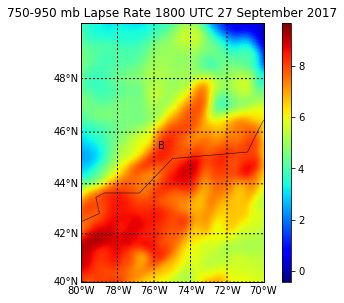

466677.1037316064 813367.3460701555


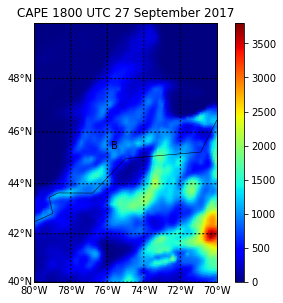

466677.1037316064 813367.3460701555


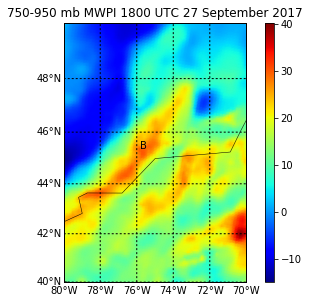

466677.1037316064 813367.3460701555


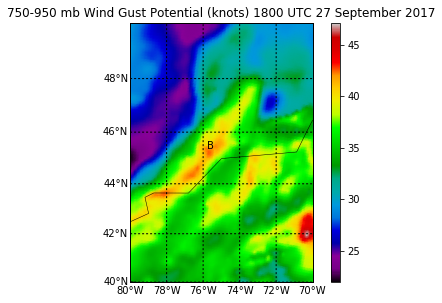

466677.1037316064 813367.3460701555


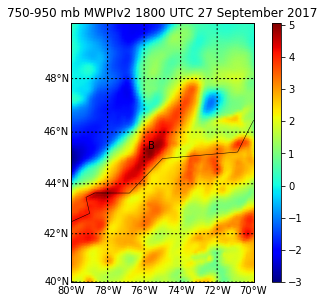

466677.1037316064 813367.3460701555


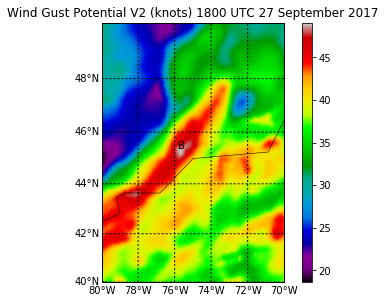

In [4]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm

def read_RAP_750(ncf):
    nc_fid = Dataset(ncf, 'r')

    Z_750 = nc_fid.variables["Geopotential_height_isobaric"][:]  # shape lat, lon as shown above
    RH_750 = nc_fid.variables["Relative_humidity_isobaric"][:]
    T_750 = nc_fid.variables["Temperature_isobaric"][:]
    X = nc_fid.variables["x"][:]
    Y = nc_fid.variables["y"][:]
    lats = nc_fid.variables['lat'][:]  # extract/copy the data
    lons = nc_fid.variables['lon'][:]
    nc_fid.close()
    return Z_750, RH_750, T_750, X, Y, lats, lons

def read_RAP_950(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z_950 = nc_fid.variables["Geopotential_height_isobaric"][:]  # shape lat, lon as shown above
    RH_950 = nc_fid.variables["Relative_humidity_isobaric"][:]
    T_950 = nc_fid.variables["Temperature_isobaric"][:]
    X = nc_fid.variables["x"][:]
    Y = nc_fid.variables["y"][:]
    lats = nc_fid.variables['lat'][:]  # extract/copy the data
    lons = nc_fid.variables['lon'][:]
    nc_fid.close()
    return Z_950, RH_950, T_950, X, Y, lats, lons

def read_RAP_CAPE(ncf):
    nc_fid = Dataset(ncf, 'r')
    CAPE = nc_fid.variables["Convective_available_potential_energy_surface"][:]  # shape lat, lon as shown above
    X = nc_fid.variables["x"][:]
    Y = nc_fid.variables["y"][:]
    lats = nc_fid.variables['lat'][:]  # extract/copy the data
    lons = nc_fid.variables['lon'][:]
    nc_fid.close()
    return CAPE, X, Y, lats, lons

RAP_file_750 = 'RR_CONUS_13km_20170927_1800_750.nc4'
Z_750, RH_750, T_750, X, Y, lats, lons = read_RAP_750(RAP_file_750)
Z_750 = Z_750[0,0,:,:]
Z_750_km = Z_750/1000
RH_750 = RH_750[0,0,:,:]
T_750 = T_750[0,0,:,:]
T_750_C = T_750 - 273.15
#TD_650 = T_650_C - ((100-RH_650)/5)
TD_750 = ((0.198 + (0.0017*T_750_C))*RH_750) + ((0.84*T_750_C)-19.2)
print('Z_750 shape', Z_750.shape, Z_750)
print('RH_750 shape', RH_750.shape, RH_750)
print('T_750 shape', T_750.shape, T_750)
print('T_750_C shape', T_750_C.shape, T_750_C)
print('TD_750 shape', TD_750.shape, TD_750)
print('X shape, Y shape', X.shape, Y.shape)
print('lats shape, lons shape', lats.shape, lons.shape)

RAP_file_950 = 'RR_CONUS_13km_20170927_1800_950.nc4'
Z_950, RH_950, T_950, X, Y, lats, lons = read_RAP_950(RAP_file_950)
Z_950 = Z_950[0,0,:,:]
Z_950_km = Z_950/1000
RH_950 = RH_950[0,0,:,:]
T_950 = T_950[0,0,:,:]
T_950_C = T_950 - 273.15
#TD_650 = T_650_C - ((100-RH_650)/5)
TD_950 = ((0.198 + (0.0017*T_950_C))*RH_950) + ((0.84*T_950_C)-19.2)
print('Z_950 shape', Z_950.shape, Z_950)
print('RH_950 shape', RH_950.shape, RH_950)
print('T_950 shape', T_950.shape, T_950)
print('T_950_C shape', T_950_C.shape, T_950_C)
print('TD_950 shape', TD_950.shape, TD_950)
print('X shape, Y shape', X.shape, Y.shape)
print('lats shape, lons shape', lats.shape, lons.shape)

RAP_file_CAPE = 'RR_CONUS_13km_20170927_1800_CAPE.nc4'
CAPE, X, Y, lats, lons = read_RAP_CAPE(RAP_file_CAPE)
CAPE = CAPE[0,:,:]
print('CAPE shape', CAPE.shape, CAPE)
print('X shape, Y shape', X.shape, Y.shape)
print('lats shape, lons shape', lats.shape, lons.shape)

def MWPI(Z_750_km, Z_950_km, T_750_C, T_950_C, TD_750, TD_950, CAPE):
        gamma = (T_950_C - T_750_C)/(Z_750_km - Z_950_km)
        DD_750 = T_750_C - TD_750
        DD_950 = T_950_C - TD_950
        DDD = DD_950 - DD_750
        MWPI = (CAPE/100) + gamma + DDD
        MWPIv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
        #WGP = (0.3163 * (MWPI+Tv_c)) + 33.766
        WGP = (0.4553 * MWPI) + 28.769
        WGPv2 = (3.775 * MWPIv2) + 29.9639
        return gamma, MWPI, MWPIv2, WGP, WGPv2
gamma, MWPI, MWPIv2, WGP, WGPv2 = MWPI(Z_750_km, Z_950_km, T_750_C, T_950_C, TD_750, TD_950, CAPE)
print('gamma shape', gamma.shape, gamma)
print('MWPI shape', MWPI.shape, MWPI)
print('WGP shape', WGP.shape, WGP)
print('MWPIv2 shape', MWPIv2.shape, MWPIv2)
print('WGPv2shape', WGPv2.shape, WGPv2)

# CREATE A MAP

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,gamma,shading='gouraud',cmap=plt.cm.jet,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,52.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-68.,2.),labels=[False,False,False,True])
m.drawcountries()
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="10%")
ax.set_title('750-950 mb Lapse Rate 1800 UTC 27 September 2017')
plt.savefig("gamma_0927_1800.png",dpi=500)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,CAPE,shading='gouraud',cmap=plt.cm.jet,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,52.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-68.,2.),labels=[False,False,False,True])
m.drawcountries()
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="10%")
ax.set_title('CAPE 1800 UTC 27 September 2017')
plt.savefig("CAPE_0927_1800.png",dpi=500)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,MWPI,shading='gouraud',cmap=plt.cm.jet,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,52.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-68.,2.),labels=[False,False,False,True])
m.drawcountries()
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="10%")
ax.set_title('750-950 mb MWPI 1800 UTC 27 September 2017')
plt.savefig("MWPI_0927_1800.png",dpi=500)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,WGP,shading='gouraud',cmap=plt.cm.nipy_spectral,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,52.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-68.,2.),labels=[False,False,False,True])
m.drawcountries()
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="10%")
ax.set_title('750-950 mb Wind Gust Potential (knots) 1800 UTC 27 September 2017')
plt.savefig("WGP_0927_1800.png",dpi=500)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,MWPIv2,shading='gouraud',cmap=plt.cm.jet,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,52.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-68.,2.),labels=[False,False,False,True])
m.drawcountries()
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="10%")
ax.set_title('750-950 mb MWPIv2 1800 UTC 27 September 2017')
plt.savefig("MWPIv2_0927_1800.png",dpi=500)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,WGPv2,shading='gouraud',cmap=plt.cm.nipy_spectral,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,52.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-68.,2.),labels=[False,False,False,True])
m.drawcountries()
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="10%")
ax.set_title('Wind Gust Potential V2 (knots) 1800 UTC 27 September 2017')
plt.savefig("WGPv2_0927_1800.png",dpi=500)
plt.show()
